**Introduction** : 

The main focus of this analysis is to derive the max number of vaccinates peoples as per states and other deep-dive analysis such as age factor ,vaccines used,month wise vaccination records 

Vaccines came into effect in india on 16 January 2021 out of which two vaccines were commisioned for usage on peoples
* Covidsheild {Serum Institute of India}
* Covaxin {Bharat Biotech}

**INSERTING AND MOUNTING DATA'S**

In [5]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATAFRAMES**

In [6]:
raw_vaccine_data = pd.read_csv('COVID-19 India Statewise Vaccine Data.csv')

In [7]:
raw_vaccine_data.shape

(4552, 15)

In [8]:
raw_vaccine_data.head(5)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,579.0,47697.0,NaN,NaN,NaN,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,635.0,57969.0,NaN,NaN,NaN,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,1299.0,98150.0,NaN,NaN,NaN,99449.0
3,19-01-2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,3017.0,192508.0,NaN,NaN,NaN,195525.0
4,20-01-2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,3946.0,247334.0,NaN,NaN,NaN,251280.0


**DATA CLEANSING**

In [9]:
raw_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Updated On                      4552 non-null   object 
 1   State                           4552 non-null   object 
 2   Total Individuals Vaccinated    4518 non-null   float64
 3   Total Sessions Conducted        4518 non-null   float64
 4   Total Sites                     4518 non-null   float64
 5   First Dose Administered         4518 non-null   float64
 6   Second Dose Administered        4518 non-null   float64
 7   Male(Individuals Vaccinated)    4518 non-null   float64
 8   Female(Individuals Vaccinated)  4518 non-null   float64
 9   Total Covaxin Administered      4518 non-null   float64
 10  Total CoviShield Administered   4518 non-null   float64
 11  18-45 years (Age)               2627 non-null   float64
 12  45-60 years (Age)               26

In [10]:
raw_vaccine_data["Updated On"] = pd.to_datetime(raw_vaccine_data["Updated On"],dayfirst=True)


In [11]:
raw_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Updated On                      4552 non-null   datetime64[ns]
 1   State                           4552 non-null   object        
 2   Total Individuals Vaccinated    4518 non-null   float64       
 3   Total Sessions Conducted        4518 non-null   float64       
 4   Total Sites                     4518 non-null   float64       
 5   First Dose Administered         4518 non-null   float64       
 6   Second Dose Administered        4518 non-null   float64       
 7   Male(Individuals Vaccinated)    4518 non-null   float64       
 8   Female(Individuals Vaccinated)  4518 non-null   float64       
 9   Total Covaxin Administered      4518 non-null   float64       
 10  Total CoviShield Administered   4518 non-null   float64       
 11  18-4

In [23]:
raw_vaccine_data.fillna(0,inplace=True)

In [24]:
raw_vaccine_data['Total Doses Administered'] = raw_vaccine_data['Total Doses Administered'].astype(int)

In [25]:
raw_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Updated On                      4552 non-null   datetime64[ns]
 1   State                           4552 non-null   object        
 2   Total Individuals Vaccinated    4552 non-null   float64       
 3   Total Sessions Conducted        4552 non-null   float64       
 4   Total Sites                     4552 non-null   float64       
 5   First Dose Administered         4552 non-null   float64       
 6   Second Dose Administered        4552 non-null   float64       
 7   Male(Individuals Vaccinated)    4552 non-null   float64       
 8   Female(Individuals Vaccinated)  4552 non-null   float64       
 9   Total Covaxin Administered      4552 non-null   float64       
 10  Total CoviShield Administered   4552 non-null   float64       
 11  18-4

In [26]:
raw_vaccine_data.State.unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu'], dtype=object)

In [27]:
raw_vaccine_data[raw_vaccine_data.State == "India"].count()

Updated On                        144
State                             144
Total Individuals Vaccinated      144
Total Sessions Conducted          144
Total Sites                       144
First Dose Administered           144
Second Dose Administered          144
Male(Individuals Vaccinated)      144
Female(Individuals Vaccinated)    144
Total Covaxin Administered        144
Total CoviShield Administered     144
18-45 years (Age)                 144
45-60 years (Age)                 144
60+ years (Age)                   144
Total Doses Administered          144
dtype: int64

In [28]:
raw_vaccine_data.drop(raw_vaccine_data[raw_vaccine_data["State"] == "India"].index, inplace=True)

In [29]:
raw_vaccine_data.shape

(4408, 15)

In [30]:
raw_vaccine_data.head(5)


,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
144,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,23.0,0.0,0.0,0.0,23
145,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,23.0,0.0,0.0,0.0,23
146,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,42.0,0.0,0.0,0.0,42
147,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,89.0,0.0,0.0,0.0,89
148,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,124.0,0.0,0.0,0.0,124


**VISUALIZATION & ANALYSIS**

In [31]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16

In [33]:
vaccination = raw_vaccine_data.groupby("State")[["Total Doses Administered"]].max().sort_values("Total Doses Administered",ascending=False)

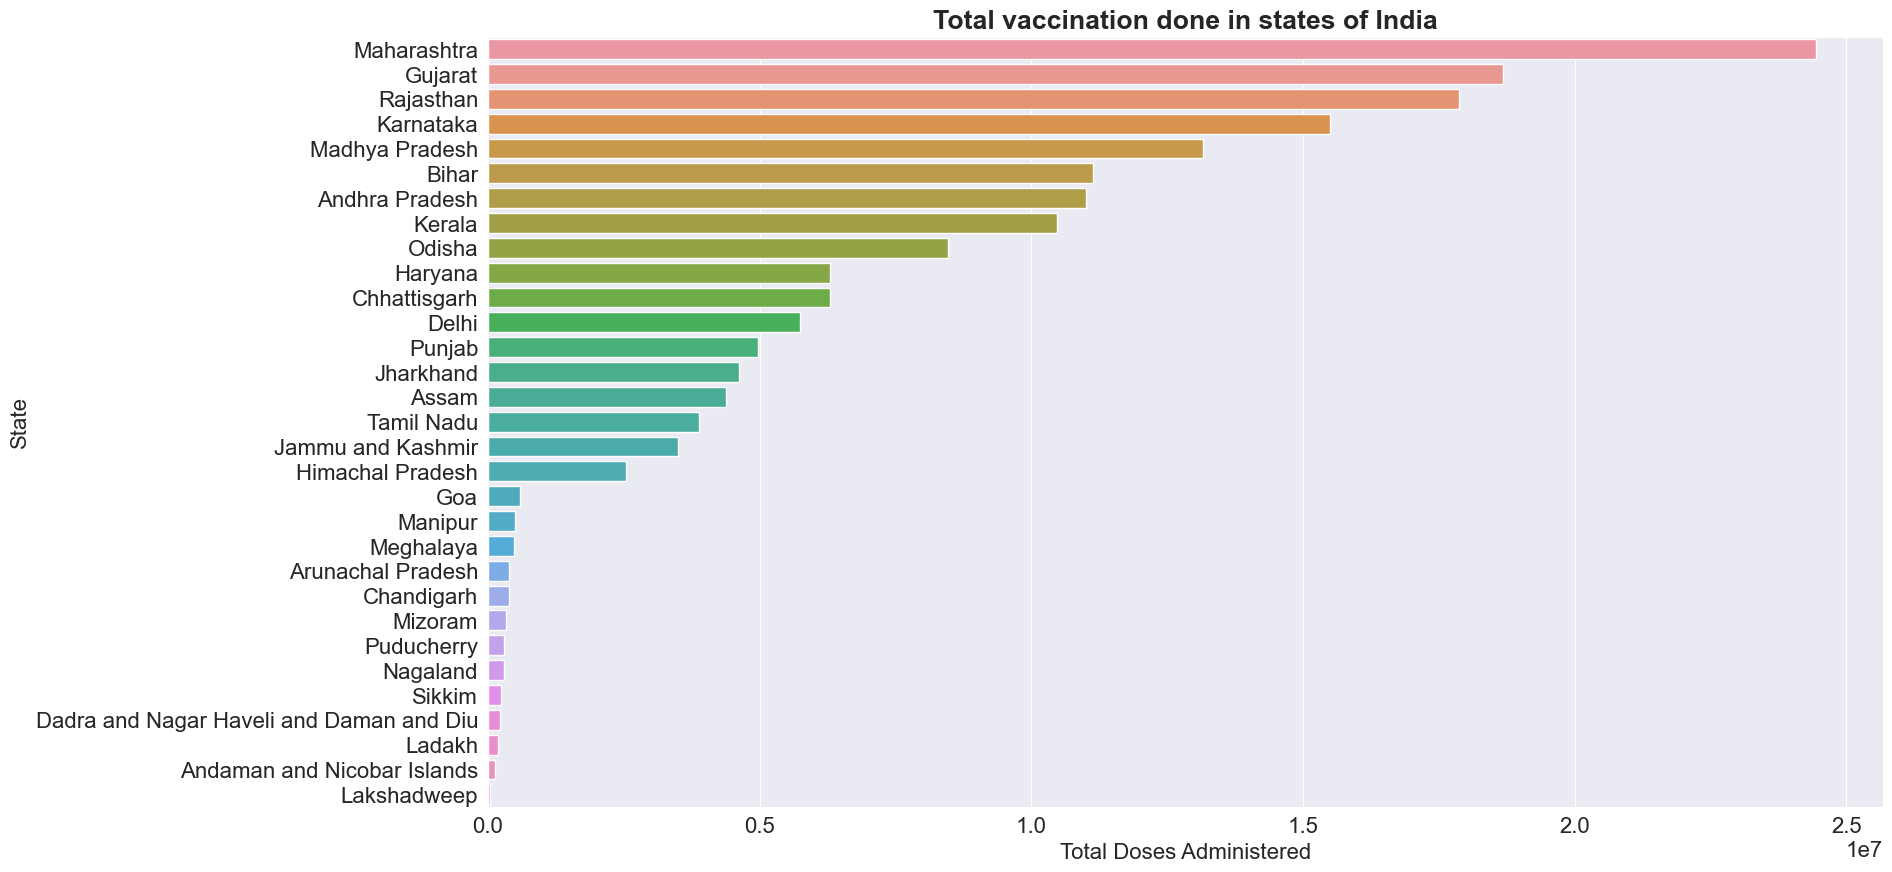

In [34]:
plt.figure(figsize=(18,10))
plt.title("Total vaccination done in states of India", fontweight="bold")

sns.barplot(x=vaccination["Total Doses Administered"], y=vaccination.index);

* Maharashtra is the maximum vaccinated state in India
* Followed by Gujarat,Rajasthan & Karnataka

**ANALYSIS THROUGH POPULATION COUNTS**

In [96]:
population = pd.read_csv("Uidai list.csv")

In [97]:
population.head(5)

,State,Population 2020
0,India,1370508600
1,Andaman and Nicobar Islands,417036
2,Andhra Pradesh,53903502
3,Arunachal Pradesh,1570458
4,Assam,35607039


In [98]:
total_vaccination = pd.merge(vaccination,population,on="State")
total_vaccination.head(5)

,State,Total Doses Administered,Population 2020
0,Maharashtra,24450364,123144223
1,Gujarat,18686516,63872399
2,Rajasthan,17872011,81032689
3,Karnataka,15504527,67562686
4,Madhya Pradesh,13151267,85358965


**ANALYSIS THROUGH GENDER COUNTS**

In [111]:
male = raw_vaccine_data.groupby("State")[["Male(Individuals Vaccinated)"]].max().sum()
female = raw_vaccine_data.groupby("State")[["Female(Individuals Vaccinated)"]].max().sum()

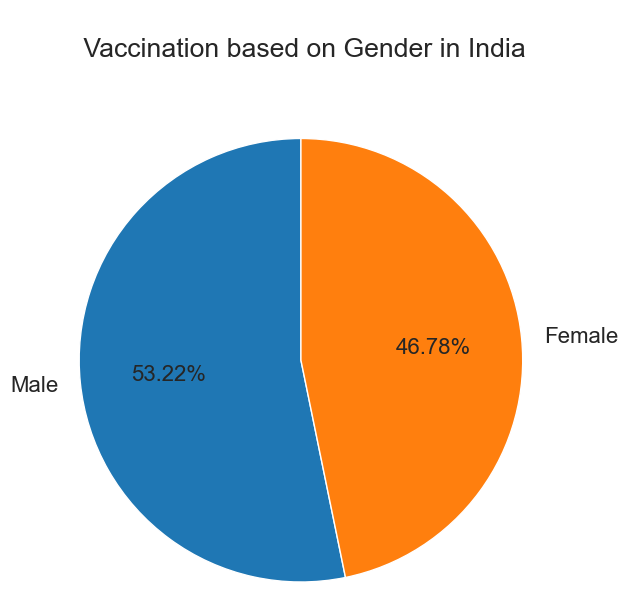

In [112]:
plt.axis("equal")
plt.title(" \n Vaccination based on Gender in India\n\n\n\n")
plt.pie([male[0],female[0]], 
        labels=["Male","Female"], 
        autopct="%0.2f%%", 
        startangle=90,
        radius=1.5);

* From above chart, we can conclude that there is not much difference between the male and female vaccination

**ANALYSIS THROUGH NUMBER OF DOSES ADMINISTRADED**

In [115]:
doses = raw_vaccine_data.groupby("State")[["First Dose Administered","Second Dose Administered"]].max()


In [137]:
plt.figure(figsize=(18,10))

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

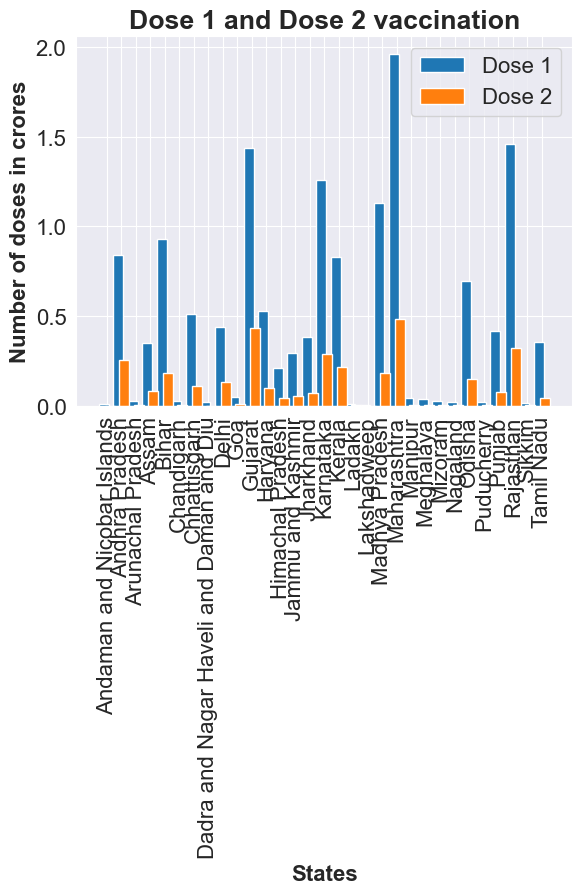

In [142]:
xpos = np.arange(len(doses.index))
plt.xticks(xpos,doses.index,rotation=90)
plt.bar(xpos-0.2,doses["First Dose Administered"]/1e7, label="Dose 1",width=0.7)
plt.bar(xpos+0.2,doses["Second Dose Administered"]/1e7, label="Dose 2",width=0.7)
plt.xlabel("States",fontweight="bold")
plt.ylabel("Number of doses in crores",fontweight="bold")
plt.title("Dose 1 and Dose 2 vaccination",fontweight="bold")
plt.legend();


* From above graph, we can see that in each state number of first dose is high as compared to second dose because of waiting period between each doses

**ANALYSIS THROUGH TYPES OF VACCINES ADMINISTRADED**

In [143]:
vaccine_type = raw_vaccine_data.groupby("State")[["Total Covaxin Administered", "Total CoviShield Administered"]].max().sum()
vaccine_type

Total Covaxin Administered        20277700.0
Total CoviShield Administered    156886911.0
dtype: float64

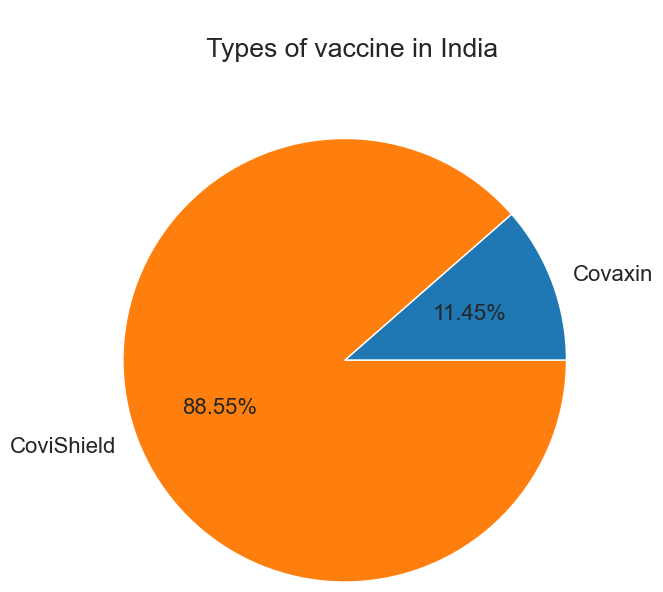

In [144]:
plt.axis("equal")
plt.title(" \n  Types of vaccine in India\n\n\n\n")
plt.pie(vaccine_type, 
        labels=["Covaxin","CoviShield"], 
        autopct="%0.2f%%",
        radius=1.5);

* From the above chart covishield has been widely used for vaccination than covaxin
* Beacause of the availabilit of covidshield is higher than covaxin
* Also covishield is more effective compared to covaxin

**ANALYSIS BY MONTHS**

In [146]:
month = pd.DatetimeIndex(raw_vaccine_data["Updated On"]).month

In [148]:
month_state_data = raw_vaccine_data.groupby([month,"State"])[["First Dose Administered"]].max()
month_state_data.reset_index(inplace=True)

In [149]:
month_data = month_state_data.groupby("Updated On")[["First Dose Administered"]].sum()
month_data

,First Dose Administered
Updated On,
1,2335720.0
2,8378728.0
3,43313627.0
4,98688942.0
5,127496367.0
6,140246256.0


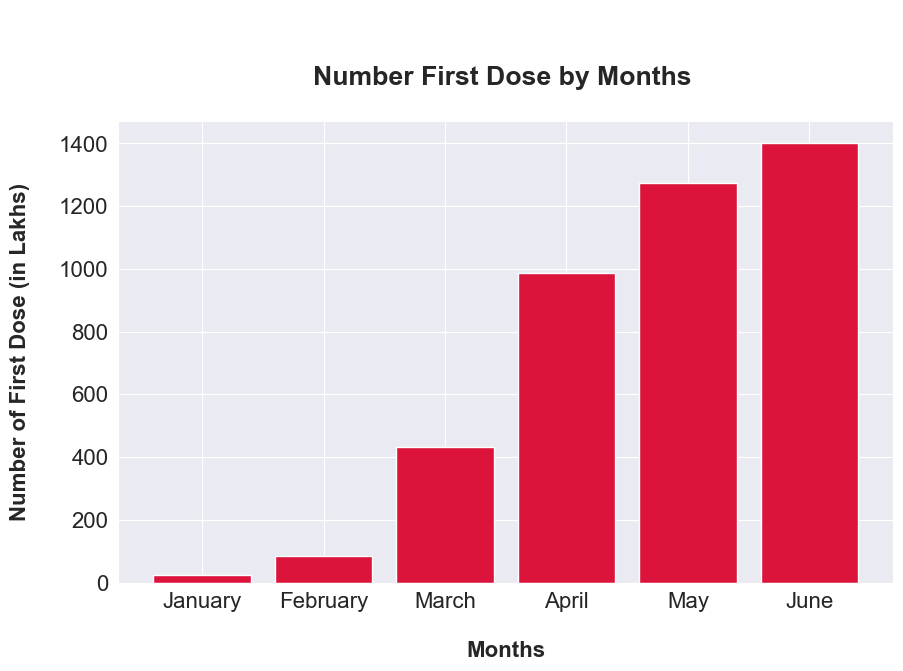

In [168]:
plt.figure(figsize=(10,6))
plt.xlabel("\nMonths",fontweight="bold")
plt.ylabel("Number of First Dose (in Lakhs)\n",fontweight="bold")
plt.title("\n\nNumber First Dose by Months \n",fontweight="bold")
plt.bar(["January", "February", "March", "April", "May" ,"June"], month_data["First Dose Administered"]/1e5, color="crimson");

* It can be clearly concluded from above graph that in month of june maximum number of vaccines are taken and this duration gap is high because of the awareness creation among people to takke vaccines

**ANALYSIS BY AGE GROUPS**

In [165]:
age = raw_vaccine_data.groupby("State")[["18-45 years (Age)", "45-60 years (Age)", "60+ years (Age)"]].max().sum()

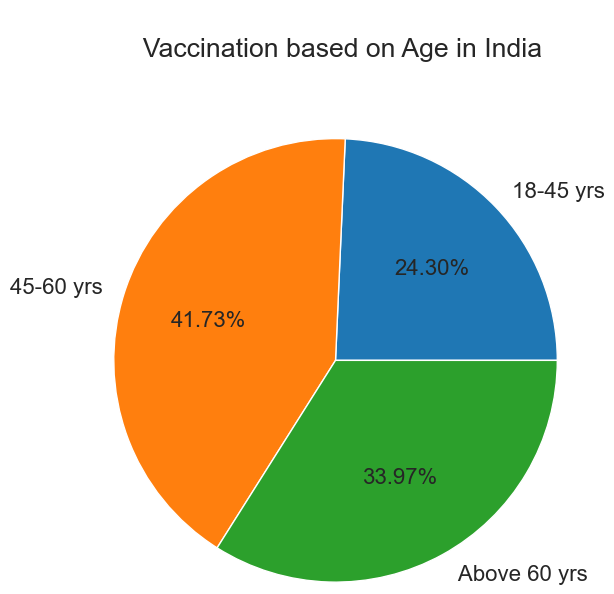

In [166]:
plt.axis("equal")
plt.title(" \n  Vaccination based on Age in India\n\n\n\n")
plt.pie(age, 
        labels=["18-45 yrs","45-60 yrs"," Above 60 yrs"], 
        autopct="%0.2f%%",
        radius=1.5);

* The age group above 45 years has been vaccinated more in comparison to others as the vaccination of this group has started early.

**CONCLUSION**

* Maharashtra is the maximum vaccinated state in India Followed by Gujarat,Rajasthan & Karnataka.
* we can conclude that there is not much difference between the male and female vaccination percentage
* we can see that in each state number of first dose is high as compared to second dose because of waiting period between each doses
* covishield has been widely used for vaccination than covaxin
* The age group above 45 years has been vaccinated more in comparison to others as the vaccination of this group has started early.